**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 5 | K-Means Clustering

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.vq import kmeans2

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [12, 5]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 

## Task 1:  Import and explore the data

We are going to be using K-Means to explore the flea beetle dataset which contains measurements of three different types of beetles.

**Dataset Variables**      
**species:** Ch. concinna, Ch. heptapotamica, and Ch. heikertingeri     
**tars1:** width of the first joint of the first tarsus in microns    
**tars2:** width of the second joint of the first tarsus in microns    
**head:** the maximal width of the head between the external edges of the eyes in 0.01 mm    
**aede1:** the maximal width of the aedeagus in the fore-part in microns     
**aede2:** the front angle of the aedeagus (1 unit = 7.5 degrees)    
**aede3:** the aedeagus width from the side in microns    
 
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from `data/flea.csv`.
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, check out the data
    1. Print the shape of the data
    2. Print first 5 rows of the data using head.
3. The `species` variable is a categorical data variable with 3 levels: `['Concinna', 'Heikert', 'Heptapot']`. Convert the data type of this column in the DataFrame to [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html).
   1. Print the first 5 items of the updated DataFrane column to make sure that the replace worked correctly. You should see `Categories (3, object): ['Concinna', 'Heikert', 'Heptapot']` at the bottom of the print-out.
4. Create a list of color-blind friendly hard-coded RGB colors that will be used to color samples that belong to the same cluster. Pick either the [Okabe & Ito or one of the Petroff color palettes](https://github.com/proplot-dev/proplot/issues/424) (*These lists have been studied to be effective for colorblind individuals*). Your list of color strings should be at least as long as the number of clusters you select. Since there are 3 in this lab, any of the color palettes will work. *Each string is represented as a [hexadecimal color code](https://en.wikipedia.org/wiki/Web_colors)*.
 - For example, `colors = ['#E69F00', '#56B4E9', '#009E73']` {<font color="#E69F00">■</font>, <font color="#56B4E9">■</font>, <font color="#009E73">■</font>}
5. Graph a scatterplot of the `tars1` and `aede3` columns using plt.scatter
    1. Write a loop that runs for 3 iterations (one for each flea species).
    2. Inside the loop, use logical indexing to select rows in the DataFrame that have the current species level. Assign this 'filtered' DataFrame to a temp variable. If everything is working as expected, you should have `21`, `31`, and `22` samples for the species `'Concinna'`, `'Heikert'`, `'Heptapot'`, respectively.
    3. Plot `tars1` on the x axis and `aede3` on the y axis from the **filtered** DataFrame with markers that have a black edgecolor. Set the color to one of the strings from your hard-coded list of colors.
    4. Add a useful title, and axis labels.

(74, 8)
   id  tars1  tars2  head  aede1  aede2  aede3   species
0   1    191    131    53    150     15    104  Concinna
1   2    185    134    50    147     13    105  Concinna
2   3    200    137    52    144     14    102  Concinna
3   4    173    127    50    144     16     97  Concinna
4   5    171    118    49    153     13    106  Concinna
0    Concinna
1    Concinna
2    Concinna
3    Concinna
4    Concinna
Name: species, dtype: category
Categories (3, object): ['Concinna', 'Heikert', 'Heptapot']


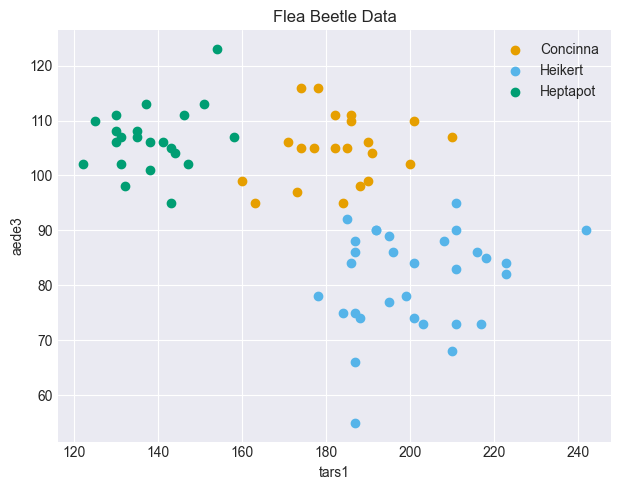

In [23]:
species = ['Concinna', 'Heikert', 'Heptapot']

# 1. Import dataset using pandas read_csv to create a Dataframe from data/flea.csv.
data = pd.read_csv('data/flea.csv')

# 2. Using the Dataframe documentation, check out the data
#    A. Print the shape of the data
print(data.shape)
#    B. Print first 5 rows of the data using head.
print(data.head())

# 3. Convert the data type of species column in the DataFrame to categorical.
data['species'] = data['species'].astype('category')
#    A. Print the first 5 items of the updated DataFrane column to make sure that the replace worked correctly.
print(data['species'].head())

# 4. Create a list of color-blind friendly hard-coded RGB colors that will be used to color samples that belong to the same cluster.
colors = ['#E69F00', '#56B4E9', '#009E73']
colors2 = ['#F0E442', '#0072B2', '#D55E00']

# 5. Graph a scatterplot of the tars1 and aede3 columns using plt.scatter
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Flea Beetle Data')
plt.xlabel('tars1')
plt.ylabel('aede3')
for i, s in enumerate(species):
    #    A. Write a loop that runs for 3 iterations (one for each flea species).
    #    B. Inside the loop, use logical indexing to select rows in the DataFrame that have the current species level. Assign this 'filtered' DataFrame to a temp variable.
    temp = data[data['species'] == s]
    #    C. Plot tars1 on the x axis and aede3 on the y axis from the filtered DataFrame with markers that have a black edgecolor. Set the color to one of the strings from your hard-coded list of colors.
    plt.scatter(temp['tars1'], temp['aede3'], color=colors[i], label=s)
plt.legend()
plt.tight_layout()
plt.show()

## Task 2: K-Means

1. Use the [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html) documentation to find out how to calculate K-Means on for the columns `tars1` and `aede3` using  kmeans2 
    1. Use 3 clusters and set the method of initialization to random. 
    2. Make sure to convert the data to floats, with `.astype('float')` before running the analysis.
2. Calculate the **inertia**: how closely packed samples are around their cluster centroids in the current clustering.
    1. For each data sample calculate the **squared** euclidean distance between that sample and its cluster centroid. Average these values across all samples.
    2. Print the inertia.
3. Graph the results of the clustering next in a plot next to the actual data. (2 subplots)
    1. Graph `'tars1'` on the x axis and `'aede3'` on the y axis
    2. Have a title for each subplot, and axis labels.
    3. Graph the original data following the instructions from Part 1 in the first subplot. 
        1. Use the `species` column of your data for the color with a black edgecolor
    4. Graph the results of K-means in the second subplot. [See example](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html)
        1. Graph the data colored by the clusters with the centroids labeled. Use your colorblind-friendly custom color palette to color each of the three clusters.

You should get an inertia of ~203.


Inertia: 203.02897851267417


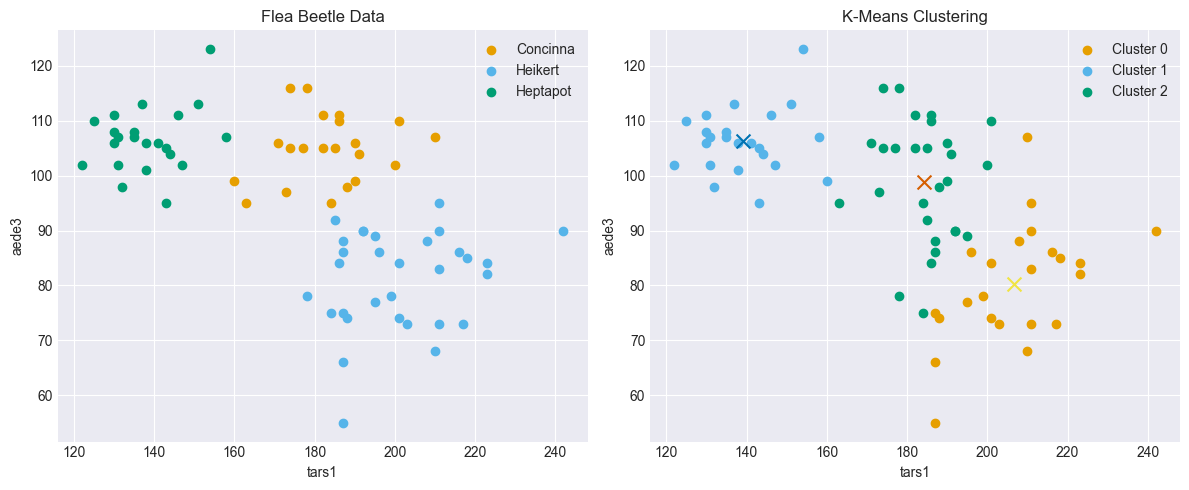

In [24]:
import analysis as an

np.random.seed(1)

# 1. Use 3 clusters and set the method of initialization to random. Make sure to convert the data to floats, with .astype('float') before running the analysis.
data_select = data.select_dtypes(np.number).astype('float')
centroids, labels = kmeans2(data_select[['tars1', 'aede3']], 3, minit='random')
# 2. Calculate the inertia: how closely packed samples are around their cluster centroids in the current clustering.
#    A. For each data sample calculate the squared euclidean distance between that sample and its cluster centroid. Average these values across all samples.
distances = an.Analysis.l2_norm_ndim(data_select[['tars1', 'aede3']].values, centroids[labels])
inertia = np.mean(distances ** 2)
#    B. Print the inertia.
print(f"Inertia: {inertia}")

# 3. Graph the results of the clustering next in a plot next to the actual data. (2 subplots)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Flea Beetle Data')
plt.xlabel('tars1')
plt.ylabel('aede3')
for i, s in enumerate(species):
    temp = data[data['species'] == s]
    plt.scatter(temp['tars1'], temp['aede3'], color=colors[i], label=s)
plt.legend()

plt.subplot(1, 2, 2)
plt.title('K-Means Clustering')
plt.xlabel('tars1')
plt.ylabel('aede3')
for i in range(3):
    temp = data[labels == i]
    plt.scatter(temp['tars1'], temp['aede3'], color=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[i, 0], centroids[i, 1], color=colors2[i], marker='x', s=100)
plt.legend()

plt.tight_layout()
plt.show()


## Task 3: Analysis

1. Write code that calculates the kmeans2 50 times
2. Save the centroids, labels and inertia for each clustering instance.

In [26]:
np.random.seed(1)

# 1. Write code that calculates the kmeans2 50 times
centroids = []
labels = []
inertias = []
for i in range(50):
    # 2. Save the centroids, labels and inertia for each clustering instance.
    c, l = kmeans2(data_select[['tars1', 'aede3']], 3, minit='random')
    d = an.Analysis.l2_norm_ndim(data_select[['tars1', 'aede3']].values, c[l])
    centroids.append(c)
    labels.append(l)
    inertias.append(np.mean(d ** 2))


3. Graph a plot with 3 subplots
    1. **Original:** The first plot should graph Graph `'tars1'` on the x axis and `'aede3'` on the y axis with the original labels
    2. **Best clustering:** Using your above analysis the second plot should graph the results with the **best** K-Means fit using the saved labels and centroids from the above analysis.
    3. **Worst clustering:** Using your above analysis the third plot should graph the results with the worst K-Means fit using the saved labels and centroids from the above analysis.
    4. For formatting, follow the instructions in Task 2.

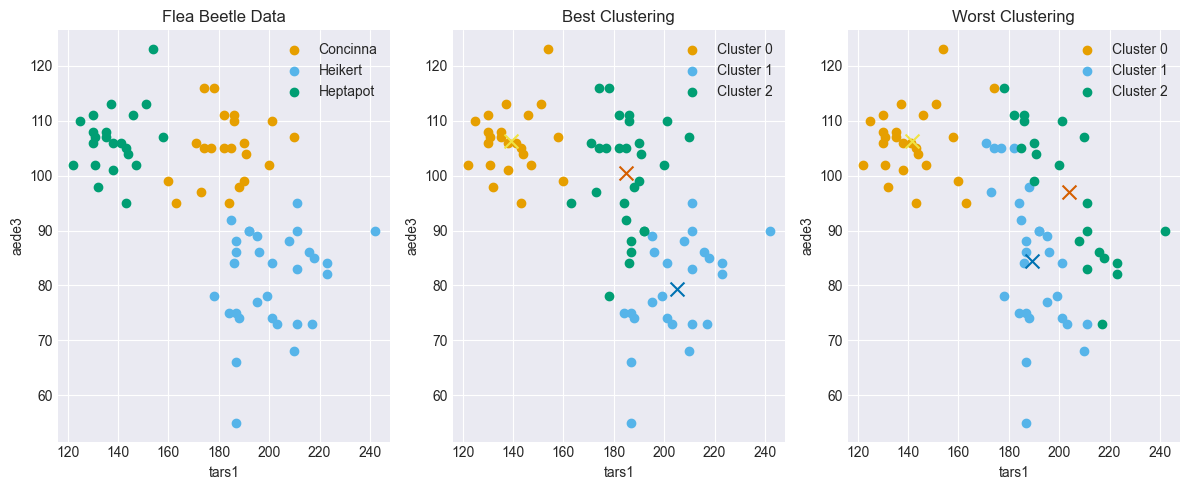

In [27]:
# 3. Graph a plot with 3 subplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title('Flea Beetle Data')
plt.xlabel('tars1')
plt.ylabel('aede3')
for i, s in enumerate(species):
    temp = data[data['species'] == s]
    plt.scatter(temp['tars1'], temp['aede3'], color=colors[i], label=s)
plt.legend()

plt.subplot(1, 3, 2)
plt.title('Best Clustering')
plt.xlabel('tars1')
plt.ylabel('aede3')
best = np.argmin(inertias)
for i in range(3):
    temp = data[labels[best] == i]
    plt.scatter(temp['tars1'], temp['aede3'], color=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[best][i, 0], centroids[best][i, 1], color=colors2[i], marker='x', s=100)
plt.legend()

plt.subplot(1, 3, 3)
plt.title('Worst Clustering')
plt.xlabel('tars1')
plt.ylabel('aede3')
worst = np.argmax(inertias)
for i in range(3):
    temp = data[labels[worst] == i]
    plt.scatter(temp['tars1'], temp['aede3'], color=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[worst][i, 0], centroids[worst][i, 1], color=colors2[i], marker='x', s=100)
plt.legend()

plt.tight_layout()
plt.show()

#### Question 1: Why does kmeans produce different solutions?

#### Answer 1: 
K-means is highly dependent on the location of the intial centroids as such if the centroids are initialized in different locations, the algorithm will converge to different solutions. as there may exist many local minima / sinks in the optimization problem. Thinking of it kind of like gradient descent, if you start at different points you may end up at different local minima, as the manifold corresponding to "energy" of the system is like a Riemanian manifold with potentially many local minima and maxima.